In [53]:
import pandas as pd
import numpy as np
import matplotlib as nlp
import re
import nltk

In [54]:
#read file
tweets  = pd.read_csv("/content/drive/MyDrive/tweets/World Cup 2022 Tweets.csv")
#display the first tweets
tweets.head()

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source
0,Craig Forrest,NaN,2011-01-14 19:09:55+00:00,20346.0,18790,TRUE,2023-01-18 15:49:26+00:00,Thanks Oso for sharing your experience at the ...,Twitter for iPhone
1,Hosayni Official,NaN,2022-06-22 23:22:12+00:00,7.0,93,FALSE,2023-01-18 15:33:42+00:00,1 month ago at #QatarWorldCup2022 #Davido 001 ...,Twitter for Android
2,꧁Jineesh Janardhanan꧂,Harippad (Alappuzha ),2019-08-25 10:32:09+00:00,2414.0,15326,FALSE,2023-01-18 14:18:42+00:00,It's been exactly a month 🏆\n#Argentina #Qatar...,Twitter for Android
3,iLOT,NaN,2021-07-15 03:20:39+00:00,3201.0,421,FALSE,2023-01-18 13:46:52+00:00,Exactly one month 🏆\n#QatarWorldCup2022 https:...,TweetDeck
4,Chanda Dalmiya,"Kolkata, India",2020-03-07 10:50:09+00:00,397.0,13600,FALSE,2023-01-18 13:46:34+00:00,@a23_fantasy Answer :- D) 6 Times\n\n#ContestA...,Twitter for Android


clearing duplicates

In [55]:
tweets.drop_duplicates(subset='text',inplace=True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119970 entries, 0 to 124677
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_name        119970 non-null  object 
 1   user_location    75907 non-null   object 
 2   user_created     119969 non-null  object 
 3   user_followers   119969 non-null  float64
 4   user_favourites  119969 non-null  object 
 5   user_verified    119969 non-null  object 
 6   date             119969 non-null  object 
 7   text             119969 non-null  object 
 8   source           119966 non-null  object 
dtypes: float64(1), object(8)
memory usage: 9.2+ MB


deep cleaning

In [56]:
#replace all NaN values wit an empty string
tweets = tweets.replace(np.nan, '')
tweets.shape
# function for twitter text cleaning
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    return text
#Apply text cleaning function to text column in tweets dataframe
tweets['text'] = tweets['text'].apply(lambda x:tweet_cleaner(x))
tweets.shape

(119970, 9)

In [57]:
tweets = tweets.sample(frac=1)
tweets = tweets[:200000]
print("Dataset shape:", tweets.shape)

Dataset shape: (119970, 9)


In [58]:
!pip install vaderSentiment
!pip install twython
nltk.download('vader_lexicon')#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [59]:
tweets['scores'] = tweets['text'].apply(lambda text: sid.polarity_scores(text))
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores
115177,CapitanoRez ,"Washington, DC",2022-02-04 20:54:25+00:00,408.0,10202,FALSE,2022-11-21 07:20:16+00:00,Now let this sink in #QatarWorldCup2022 #England,Twitter for iPhone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
36845,JP Le Grasse Ⓩ 🇨🇵 💤,France,2009-10-31 15:47:50+00:00,1885.0,6859,FALSE,2022-12-14 21:52:57+00:00,"#FraMar #MarFra Maroc, airport is the way 👉🏻😂😂",Twitter Web App,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
62060,Manish chouke,India,2020-02-06 06:22:03+00:00,75.0,43744,FALSE,2022-12-09 03:02:10+00:00,Brazil #CroatiaVsBrazil #ChaiKings #QatarWorld...,Twitter for Android,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp..."
69773,Not Elon Musk,Alive in the Superunknown,2011-06-07 16:38:49+00:00,2606.0,29677,FALSE,2022-12-09 02:36:05+00:00,Almost time.... #FIFAWorldCup #NothingLikeOran...,Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
97224,Idnan Shah,Dewsbury,2010-10-04 00:06:41+00:00,56.0,961,FALSE,2022-11-29 19:47:41+00:00,Why are Wales not allowed to touch the ball???...,Twitter for Android,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp..."


In [60]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
      return "Positive"
    elif sentiment['compound'] <= -0.05: 
      return "Negative"
    else:
      return "Neutral"
final_df = tweets
tweets['sentiment'] = final_df['scores'].apply(lambda x: sentimentPredict(x))
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
115177,CapitanoRez ,"Washington, DC",2022-02-04 20:54:25+00:00,408.0,10202,FALSE,2022-11-21 07:20:16+00:00,Now let this sink in #QatarWorldCup2022 #England,Twitter for iPhone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
36845,JP Le Grasse Ⓩ 🇨🇵 💤,France,2009-10-31 15:47:50+00:00,1885.0,6859,FALSE,2022-12-14 21:52:57+00:00,"#FraMar #MarFra Maroc, airport is the way 👉🏻😂😂",Twitter Web App,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
62060,Manish chouke,India,2020-02-06 06:22:03+00:00,75.0,43744,FALSE,2022-12-09 03:02:10+00:00,Brazil #CroatiaVsBrazil #ChaiKings #QatarWorld...,Twitter for Android,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",Positive
69773,Not Elon Musk,Alive in the Superunknown,2011-06-07 16:38:49+00:00,2606.0,29677,FALSE,2022-12-09 02:36:05+00:00,Almost time.... #FIFAWorldCup #NothingLikeOran...,Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
97224,Idnan Shah,Dewsbury,2010-10-04 00:06:41+00:00,56.0,961,FALSE,2022-11-29 19:47:41+00:00,Why are Wales not allowed to touch the ball???...,Twitter for Android,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",Negative


In [61]:
tweets = tweets.replace(['Positive','Neutral','Negative'],[2, 1, 0])

In [62]:
tweets.head(5)

,user_name,user_location,user_created,user_followers,user_favourites,user_verified,date,text,source,scores,sentiment
115177,CapitanoRez ,"Washington, DC",2022-02-04 20:54:25+00:00,408.0,10202,FALSE,2022-11-21 07:20:16+00:00,Now let this sink in #QatarWorldCup2022 #England,Twitter for iPhone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
36845,JP Le Grasse Ⓩ 🇨🇵 💤,France,2009-10-31 15:47:50+00:00,1885.0,6859,FALSE,2022-12-14 21:52:57+00:00,"#FraMar #MarFra Maroc, airport is the way 👉🏻😂😂",Twitter Web App,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
62060,Manish chouke,India,2020-02-06 06:22:03+00:00,75.0,43744,FALSE,2022-12-09 03:02:10+00:00,Brazil #CroatiaVsBrazil #ChaiKings #QatarWorld...,Twitter for Android,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",2
69773,Not Elon Musk,Alive in the Superunknown,2011-06-07 16:38:49+00:00,2606.0,29677,FALSE,2022-12-09 02:36:05+00:00,Almost time.... #FIFAWorldCup #NothingLikeOran...,Twitter for Android,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
97224,Idnan Shah,Dewsbury,2010-10-04 00:06:41+00:00,56.0,961,FALSE,2022-11-29 19:47:41+00:00,Why are Wales not allowed to touch the ball???...,Twitter for Android,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",0


In [63]:
tweets.drop(['user_name','user_location','user_created','user_followers','user_favourites','user_verified','date','source','scores'], axis=1, inplace=True)

In [64]:
tweets['text'] = tweets['text'].astype('str')


Check the number of positive vs. negative tagged sentences

In [65]:
positives = tweets['sentiment'][tweets.sentiment == 2 ]
negatives = tweets['sentiment'][tweets.sentiment == 0 ]

print('Total length of the data is:         {}'.format(tweets.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         119970
No. of positve tagged sentences is:  55120
No. of negative tagged sentences is: 20564


In [66]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
#removing shortwords
tweets['text']=tweets['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
tweets.head(5)

,text,sentiment
115177,this sink #QatarWorldCup2022 #England,1
36845,"#FraMar #MarFra Maroc, airport 👉🏻😂😂",1
62060,Brazil #CroatiaVsBrazil #ChaiKings #QatarWorld...,2
69773,Almost time.... #FIFAWorldCup #NothingLikeOran...,1
97224,Wales allowed touch ball??? unfair. #ENGvsWale...,0


In [68]:
from sklearn.utils import shuffle
tweets =  shuffle(tweets).reset_index(drop=True)

In [69]:
tokenized_tweet=tweets['text'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0    [Dirty, games, theatre....that, sums, #Argenti...
1    [decision, take, Angel, Maria?, #FIFAWorldCup2...
2    [Among, last, group, stage, matches, been, pla...
3    [WATCH:, #BNNQatar, Reports, After, losing, #F...
4    [FIFA, World, 2022:, Ramos, scores, hat-trick,...
Name: text, dtype: object

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(tweets['text'].values.astype('U'))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Train/Test Split¶


In [71]:
from sklearn.model_selection import train_test_split
X=text_counts
y=tweets['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)


Naive Bayes

In [72]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.72793198 0.73030758 0.73155789 0.73014087 0.7257231 ]
Train accuracy =79.93%
Test accuracy =73.29%


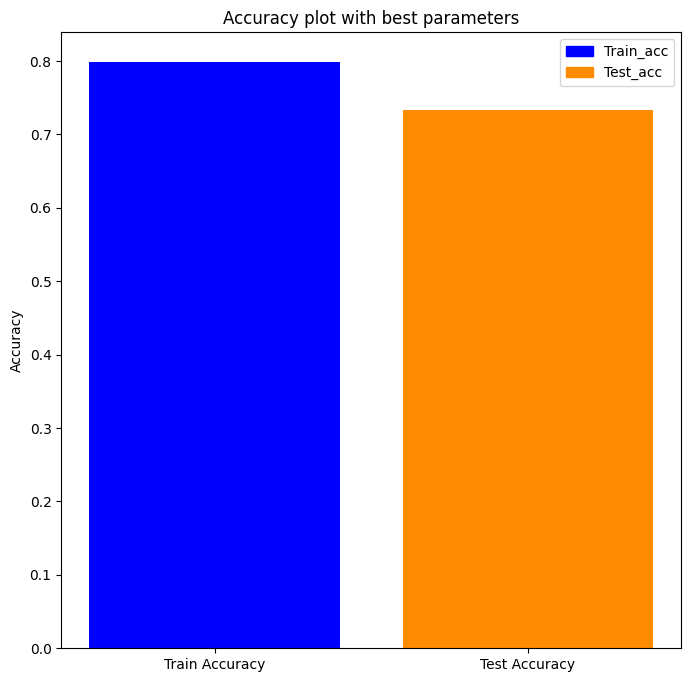

In [73]:
#plotting the best parameters
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()


Confusion Matrix

In [74]:
from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[2818  311  945]
 [1038 5383 2352]
 [ 666 1097 9384]]


In [75]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))

              precision    recall  f1-score   support

           0       0.62      0.69      0.66      4074
           1       0.79      0.61      0.69      8773
           2       0.74      0.84      0.79     11147

    accuracy                           0.73     23994
   macro avg       0.72      0.72      0.71     23994
weighted avg       0.74      0.73      0.73     23994




Calculating F1, prescision and recall scores

In [76]:
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))  
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

F1 score =71.17%
Precision score =71.86%
Recall score =71.57%


In [82]:
tweets = tweets.replace([2,1,0],['Positive', 'Neutral','Negative'])
tweets.head()

,text,sentiment
0,Dirty games theatre....that sums #Argentina's ...,Negative
1,decision take Angel Maria? #FIFAWorldCup2022 #...,Neutral
2,Among last group stage matches been played far...,Positive
3,"WATCH: #BNNQatar Reports After losing #France,...",Positive
4,FIFA World 2022: Ramos scores hat-trick Portug...,Positive


In [83]:
temp = tweets.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
2,Positive,55120
1,Neutral,44286
0,Negative,20564
